In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

## 1. Item Weight

In [5]:
missing_weigths = df_train[df_train.Item_Weight.isnull()]
missing_weigths.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


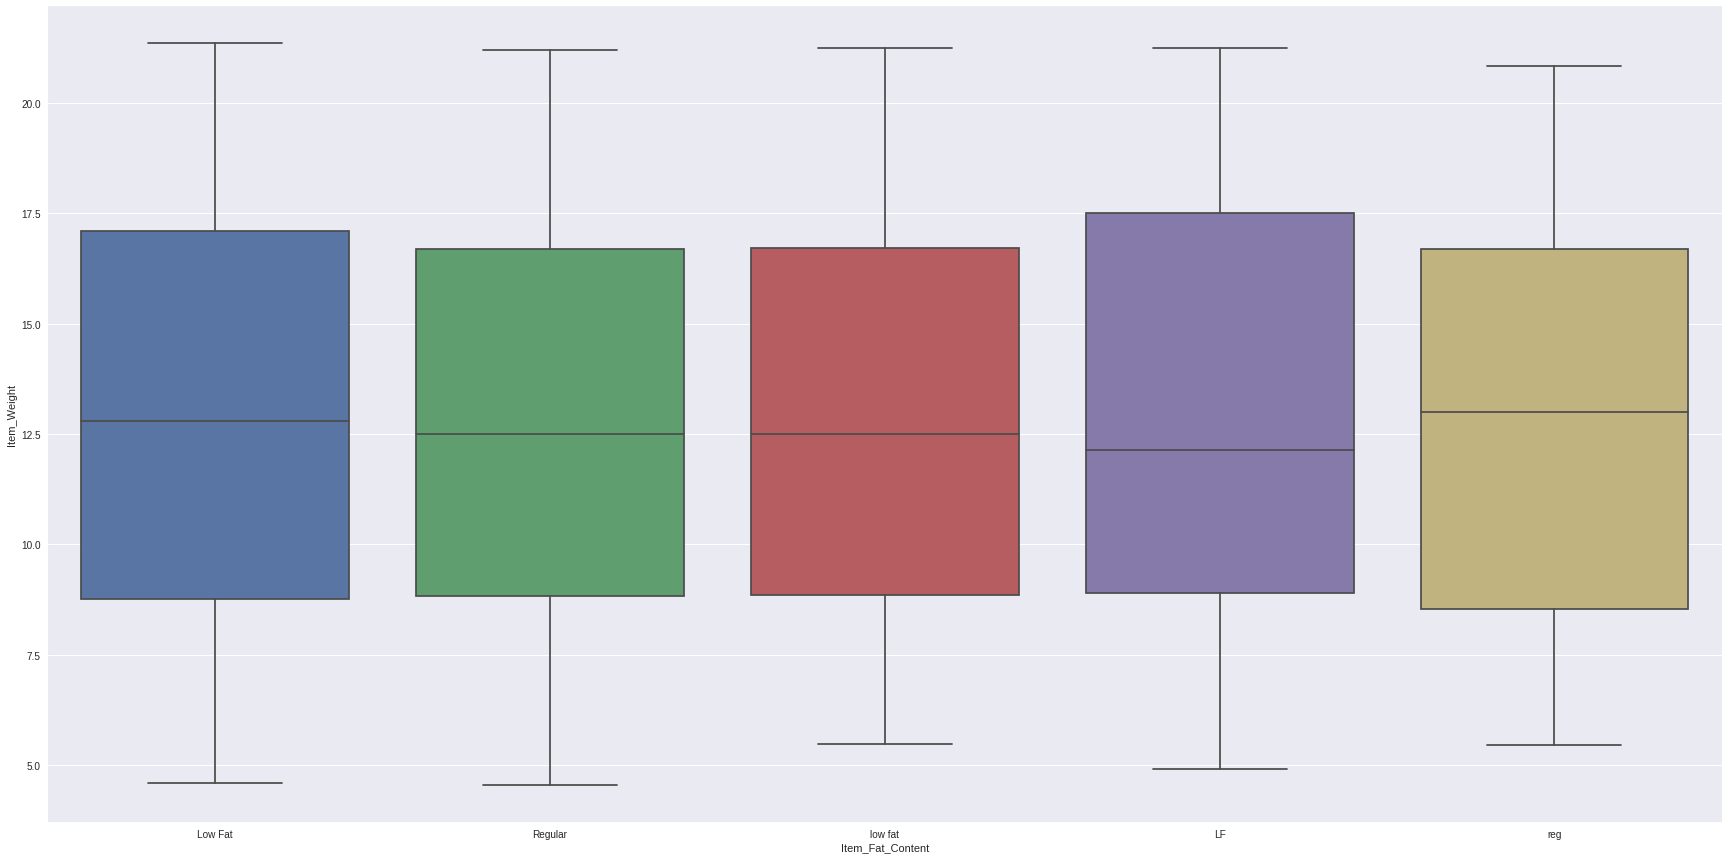

In [6]:
plt.figure(figsize=(30,15))
sns.boxplot(x="Item_Fat_Content", y="Item_Weight", data=df_train)
plt.show()

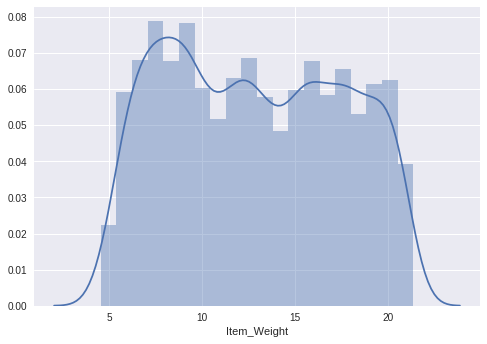

In [7]:
sns.distplot(df_train[df_train.Item_Weight.notnull()].Item_Weight)
plt.show()

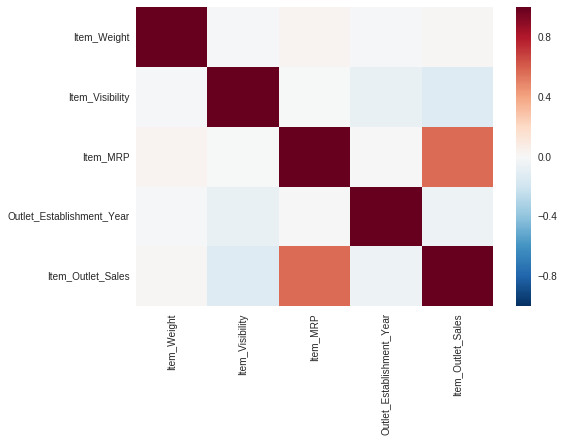

In [8]:
sns.heatmap(df_train.corr())
plt.show()

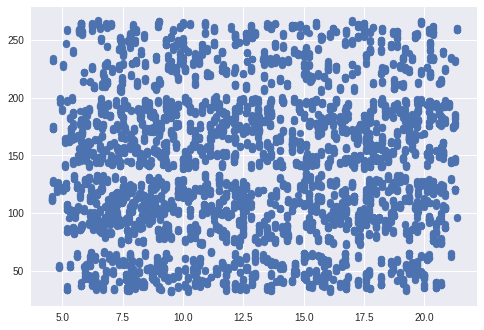

In [9]:
plt.scatter(x=df_train.Item_Weight,y=df_train.Item_MRP)
plt.show()

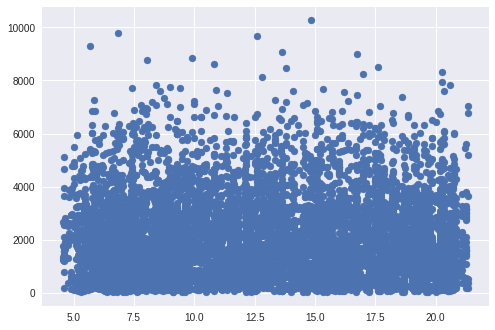

In [10]:
plt.scatter(x=df_train.Item_Weight,y=df_train.Item_Outlet_Sales)
plt.show()

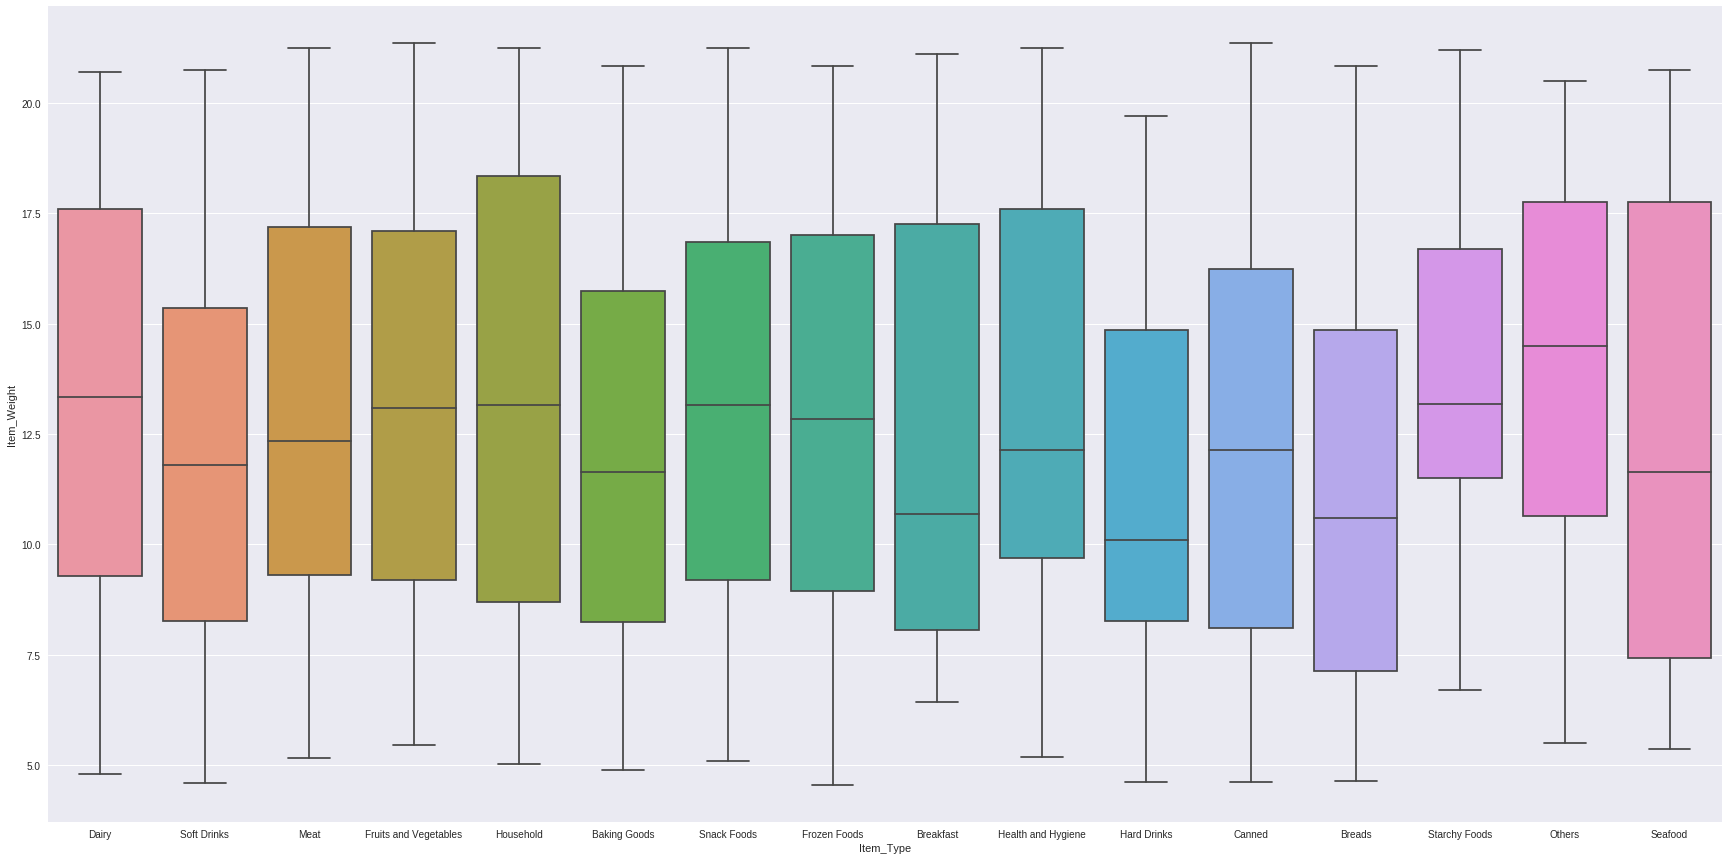

In [11]:
plt.figure(figsize=(30,15))
sns.boxplot(x="Item_Type", y="Item_Weight", data=df_train)
plt.show()

In [12]:
def plot_item_weight(df_train,item_type):
    df_train = df_train[df_train.Item_Weight.notnull()]
    data = df_train[df_train.Item_Type == item_type]['Item_Weight']
    sns.distplot(data)
    return data

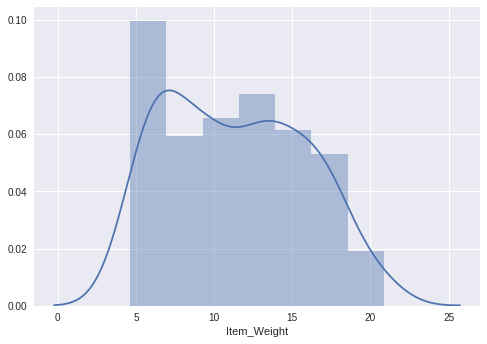

count    204.000000
mean      11.346936
std        4.440540
min        4.635000
25%        7.128750
50%       10.600000
75%       14.850000
max       20.850000
Name: Item_Weight, dtype: float64


In [15]:
data = plot_item_weight(df_train,'Breads')
plt.show()
print data.describe()

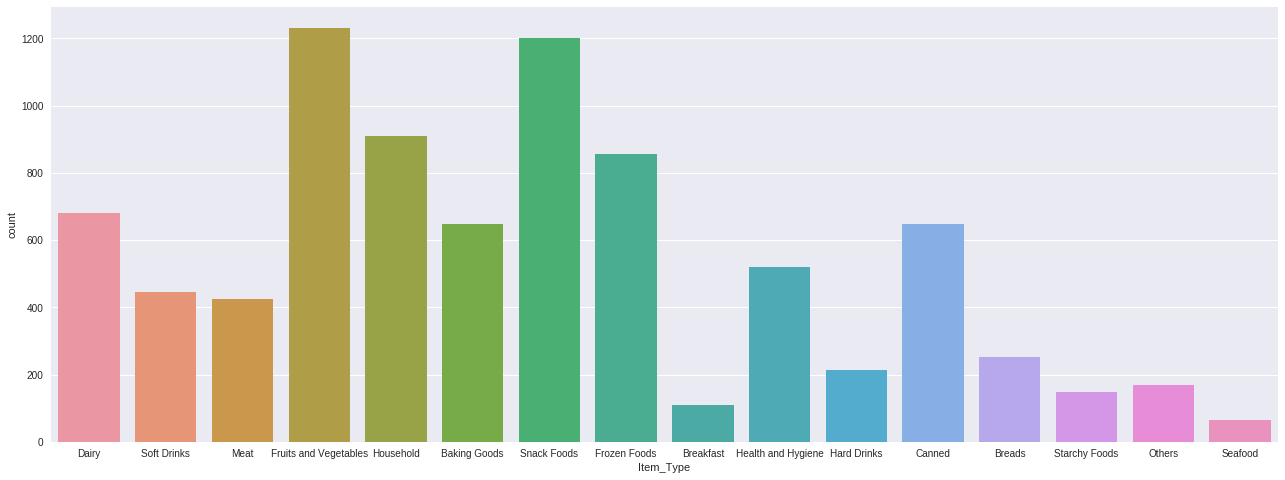

In [20]:
plt.figure(figsize=(22,8))
sns.countplot(df_train['Item_Type'])
plt.show()

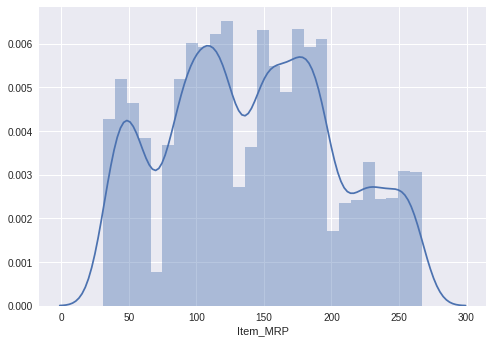

In [21]:
sns.distplot(df_train['Item_MRP'])
plt.show()

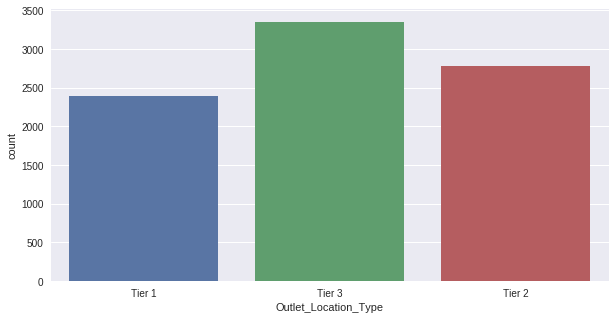

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df_train['Outlet_Location_Type'])
plt.show()

In [29]:
df_train.Outlet_Size.fillna("Blank",inplace=True)
df_train.Outlet_Size.isnull().any()

False

In [35]:
pd.crosstab(index=df_train['Outlet_Type'],columns=df_train['Outlet_Size'])

Outlet_Size,Blank,High,Medium,Small
Outlet_Type,,,,
Grocery Store,555,0,0,528
Supermarket Type1,1855,932,930,1860
Supermarket Type2,0,0,928,0
Supermarket Type3,0,0,935,0


In [32]:
df_train[df_train.Outlet_Type == 'Grocery Store']['Outlet_Size'].value_counts()

Blank    555
Small    528
Name: Outlet_Size, dtype: int64

In [37]:
pd.crosstab(index=df_train['Outlet_Location_Type'],columns=df_train['Outlet_Size'])

Outlet_Size,Blank,High,Medium,Small
Outlet_Location_Type,,,,
Tier 1,0,0,930,1458
Tier 2,1855,0,0,930
Tier 3,555,932,1863,0


In [42]:
pd.crosstab(index=df_train['Outlet_Type'],columns=[df_train['Outlet_Location_Type'],df_train['Outlet_Size']])

Outlet_Location_Type Tier 1       Tier 2       Tier 3            
Outlet_Size          Medium Small  Blank Small  Blank High Medium
Outlet_Type                                                      
Grocery Store             0   528      0     0    555    0      0
Supermarket Type1       930   930   1855   930      0  932      0
Supermarket Type2         0     0      0     0      0    0    928
Supermarket Type3         0     0      0     0      0    0    935